In [80]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctl


In [81]:
#função de Transferencia
# G(s) = 2.5/s^2+2s+5
num = np.array([2.5])
den = np.array([1,2,5])
G_s = ctl.tf(num,den)
print(G_s)


     2.5
-------------
s^2 + 2 s + 5



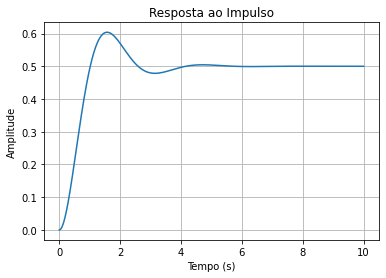

In [82]:
#resposta ao impulso
t = np.linspace (0,10,1000) #vetor de tempo
t1,y1 =ctl.step(G_s,t)
#plot da resposta ao impulso
plt.plot(y1,t1)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Impulso")
plt.grid()
plt.show()

polos:  [-1.+2.j -1.-2.j]
zeros :  []


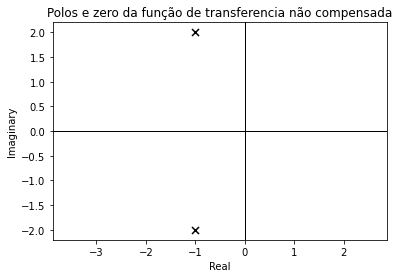

In [83]:
#polos da tf
print("polos: ",ctl.pole(G_s))
# Zeros da tf
print("zeros : ",ctl.zero(G_s))
ctl.pzmap(G_s,title="Polos e zero da função de transferencia não compensada")
plt.show()

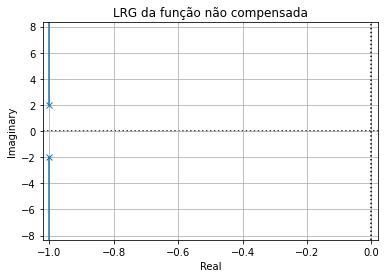

In [84]:
#Raizes da função de transferencia não Compensado
klist, rlist =ctl.rlocus(G_s,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função não compensada")
plt.grid()
plt.show()

In [85]:
#Obtendo parametros do sistema não compensado
#wn (frequencia natural não-amortecida)
wn = np.sqrt(float(num))
print("wn = ", wn)
#psi (coeficiente de amortecimento)
psi = 1/(2*wn)
print("psi = ",psi)
#ts (tempo de acomodação)
ts = 4/(psi*wn)
print('Ts = ',ts,'s')
#Mp (sobressinal)
mp = 100 * np.exp((-1*psi*np.pi)/np.sqrt(1-(psi*psi)))
print("MP = ",mp, "%")

wn =  1.5811388300841898
psi =  0.31622776601683794
Ts =  8.0 s
MP =  35.09198071784109 %


In [86]:
#sistema de malha fechada k=1
k=1
G =k * G_s/(1+G_s)
print(G)


        2.5 s^2 + 5 s + 12.5
------------------------------------
s^4 + 4 s^3 + 16.5 s^2 + 25 s + 37.5



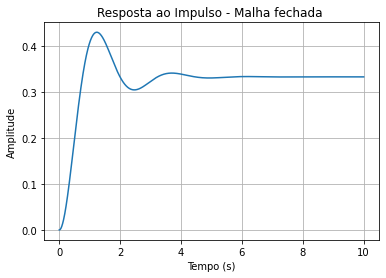

In [87]:
#resposta ao impulso - Malha fechada ganho k=1
t2,y2 =ctl.step(G,t)
#plot da resposta ao impulso - malha fechada
plt.plot(y2,t2)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Impulso - Malha fechada ")
plt.grid()
plt.show()

polos:  [-1.+2.54950976j -1.-2.54950976j -1.+2.j         -1.-2.j        ]
zeros :  [-1.+2.j -1.-2.j]


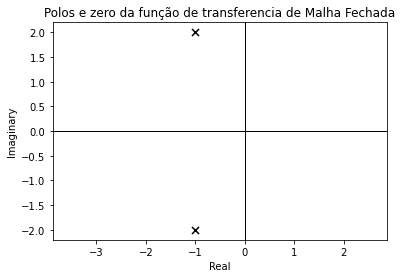

In [88]:
#polos da tf - malha fechada
print("polos: ",ctl.pole(G))
# Zeros da tf
print("zeros : ",ctl.zero(G))
ctl.pzmap(G_s,title="Polos e zero da função de transferencia de Malha Fechada")
plt.show()

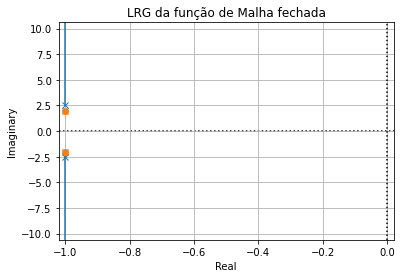

In [89]:
#Raizes da função de transferencia de malha fechada
klist1, rlist1 =ctl.rlocus(G,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função de Malha fechada")
plt.grid()
plt.show()

<ipython-input-91-83ae2c980be4>:4: RuntimeWarning: divide by zero encountered in log
  coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)
<ipython-input-91-83ae2c980be4>:4: RuntimeWarning: invalid value encountered in true_divide
  coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)


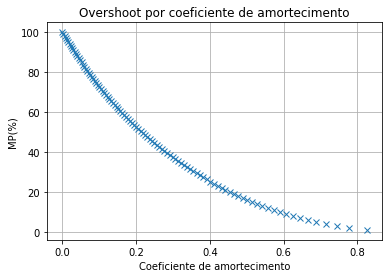

In [91]:
# plot sobressinal x coeficiente de amortecimento
#for i in range (0,100):
mp_porcent = np.linspace (0,100,100) #vetor de mp%
coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)
plt.plot(coef,mp_porcent,'x')
plt.title("Overshoot por coeficiente de amortecimento")
plt.xlabel("Coeficiente de amortecimento")
plt.ylabel("MP(%)")
plt.grid()
plt.show()


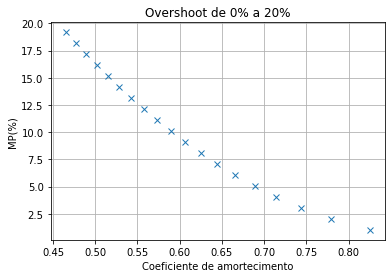

In [95]:
# plot sobressinal x coeficiente de amortecimento (zoom de 0% a 20%)
plt.plot(coef[0:20],mp_porcent[0:20],'x')
plt.title("Overshoot de 0% a 20%")
plt.xlabel("Coeficiente de amortecimento")
plt.ylabel("MP(%)")
plt.grid()
plt.show()

In [103]:
#novo wn
zeta = 0.7
wn = 4/zeta*1
print("Wn = ", wn)

#polos dominantes
s = [zeta*wn + 1j* wn*np.sqrt(1-zeta**2), zeta*wn - 1j*wn*np.sqrt(1-zeta**2)]
print("polos dominantes",s)

Wn =  5.714285714285714
polos dominantes [(4+4.080816244881628j), (4-4.080816244881628j)]
